In [4]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LassoCV
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.duplicated().sum()

2

In [8]:
df.shape

(301, 9)

In [9]:
numerical_summary = df.describe().transpose()
palette = sns.color_palette("viridis", as_cmap=True)
numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
Year,301.000000,2013.627907,2.891554,2003.000000,2012.000000,2014.000000,2016.000000,2018.000000
Selling_Price,301.000000,4.661296,5.082812,0.100000,0.900000,3.600000,6.000000,35.000000
Present_Price,301.000000,7.628472,8.642584,0.320000,1.200000,6.400000,9.900000,92.600000
Driven_kms,301.000000,36947.205980,38886.883882,500.000000,15000.000000,32000.000000,48767.000000,500000.000000
Owner,301.000000,0.043189,0.247915,0.000000,0.000000,0.000000,0.000000,3.000000


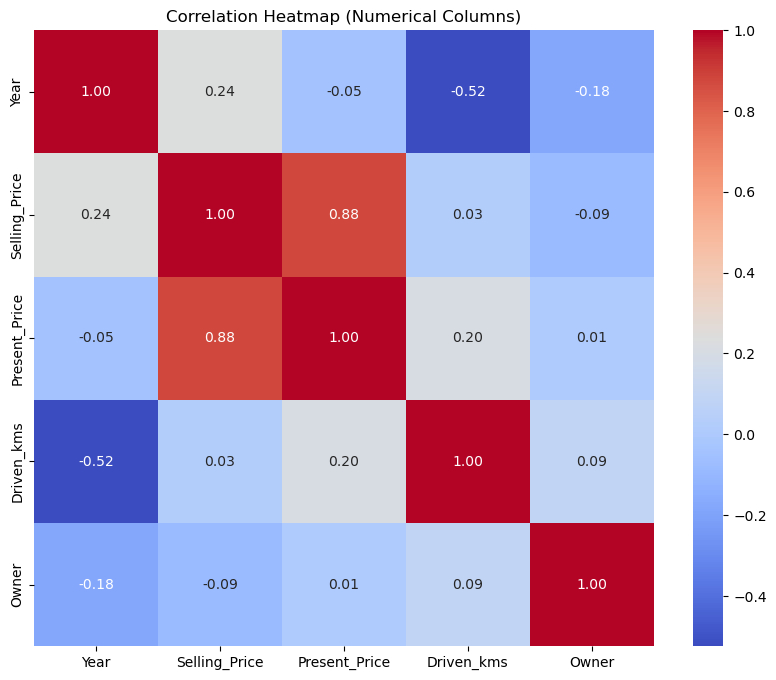

In [10]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_columns]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

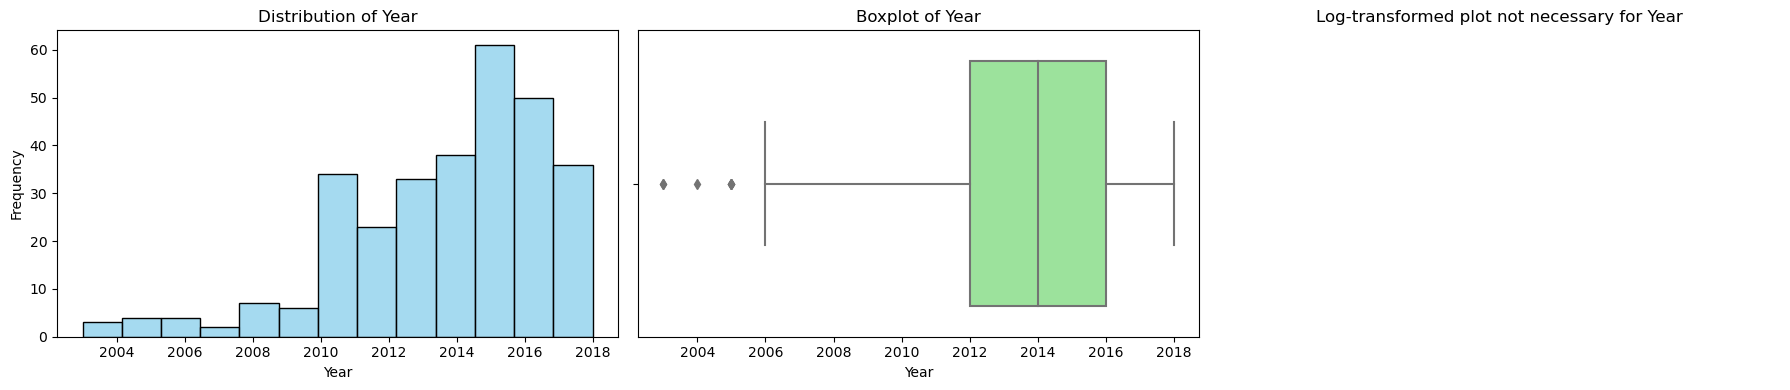

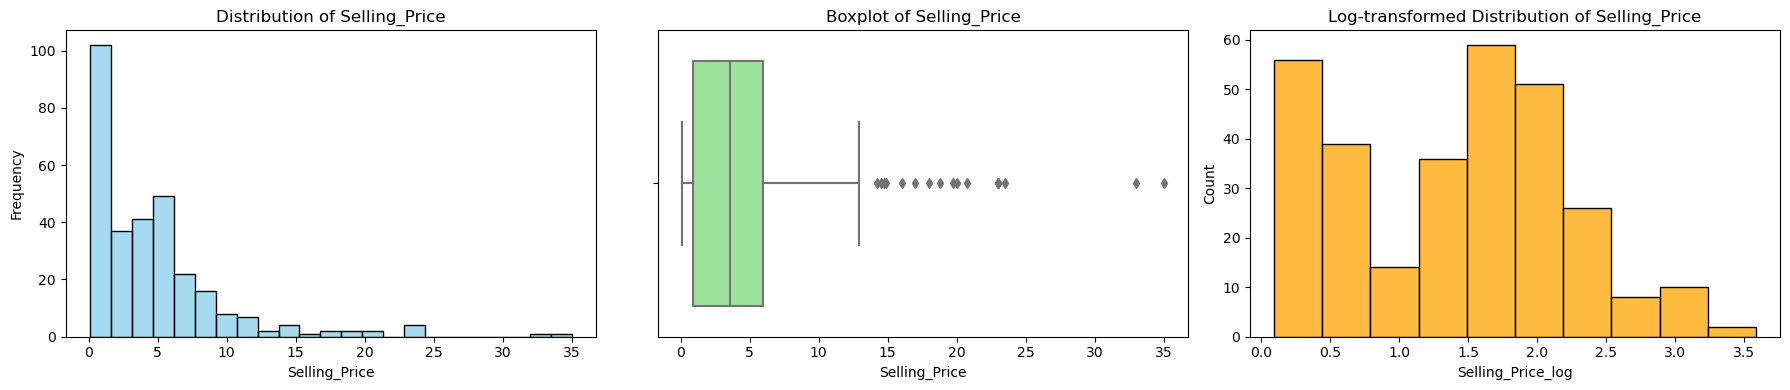

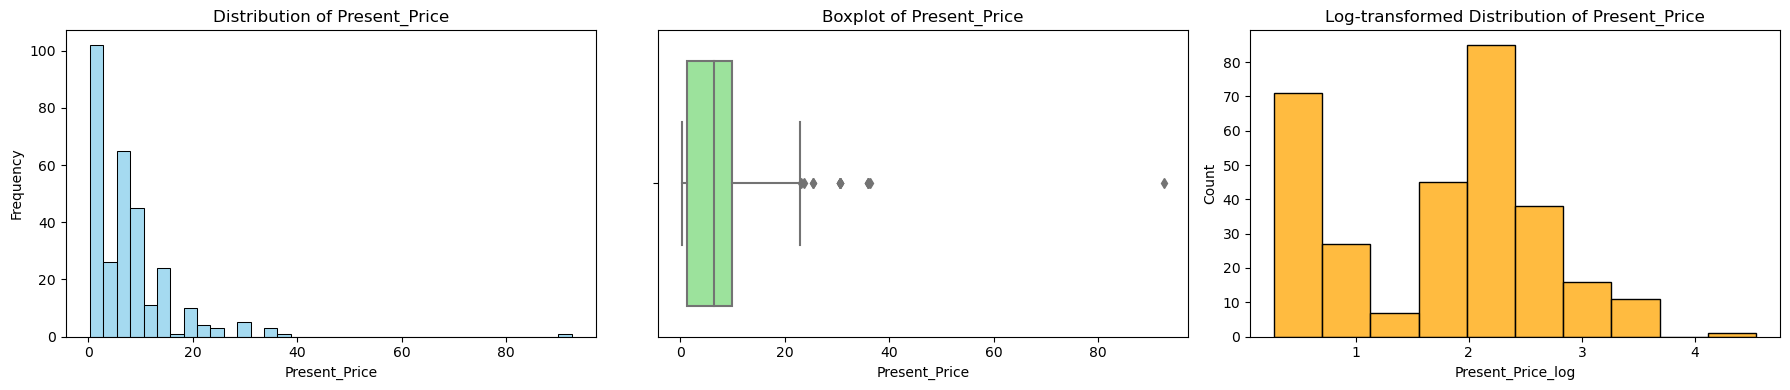

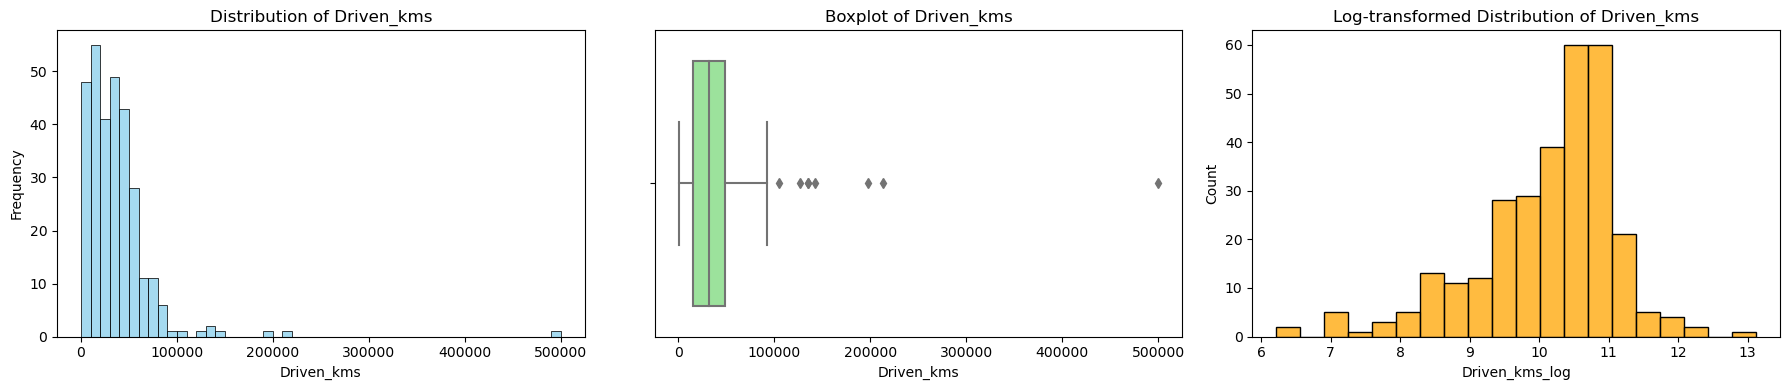

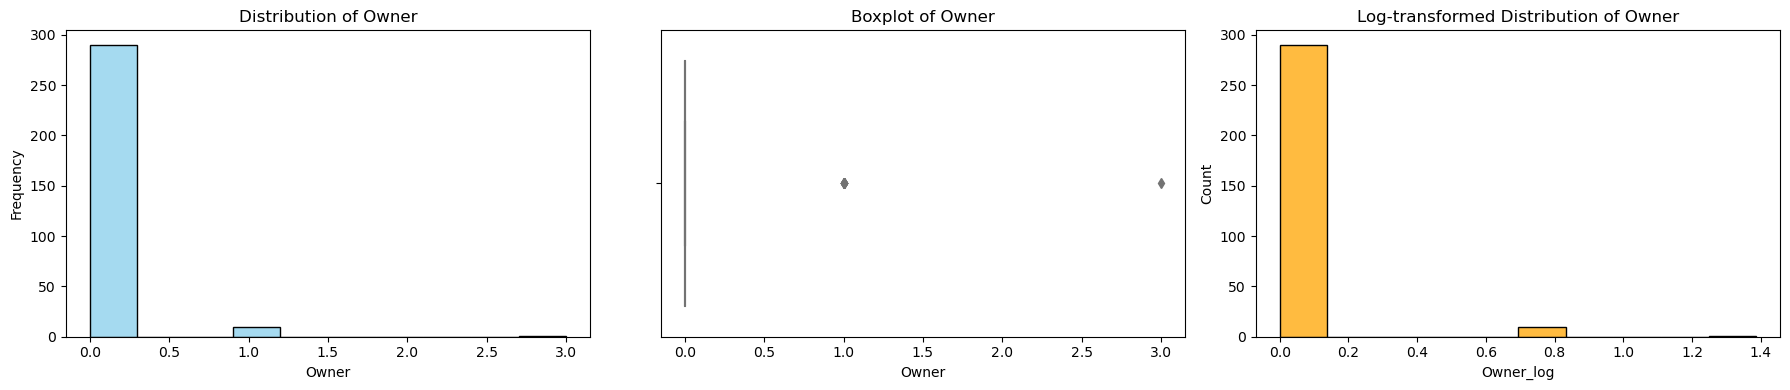

In [11]:
for column in numerical_columns:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
    sns.histplot(df[column], kde=False, color='skyblue', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')
    sns.boxplot(x=df[column], color='lightgreen', ax=ax2)
    ax2.set_title(f'Boxplot of {column}')
    if df[column].skew() > 1:
        df[column+'_log'] = np.log1p(df[column])
        sns.histplot(df[column+'_log'], kde=False, color='orange', ax=ax3)
        ax3.set_title(f'Log-transformed Distribution of {column}')
    else:
        ax3.set_title(f'Log-transformed plot not necessary for {column}')
        ax3.axis('off')

    plt.tight_layout()
    plt.show()

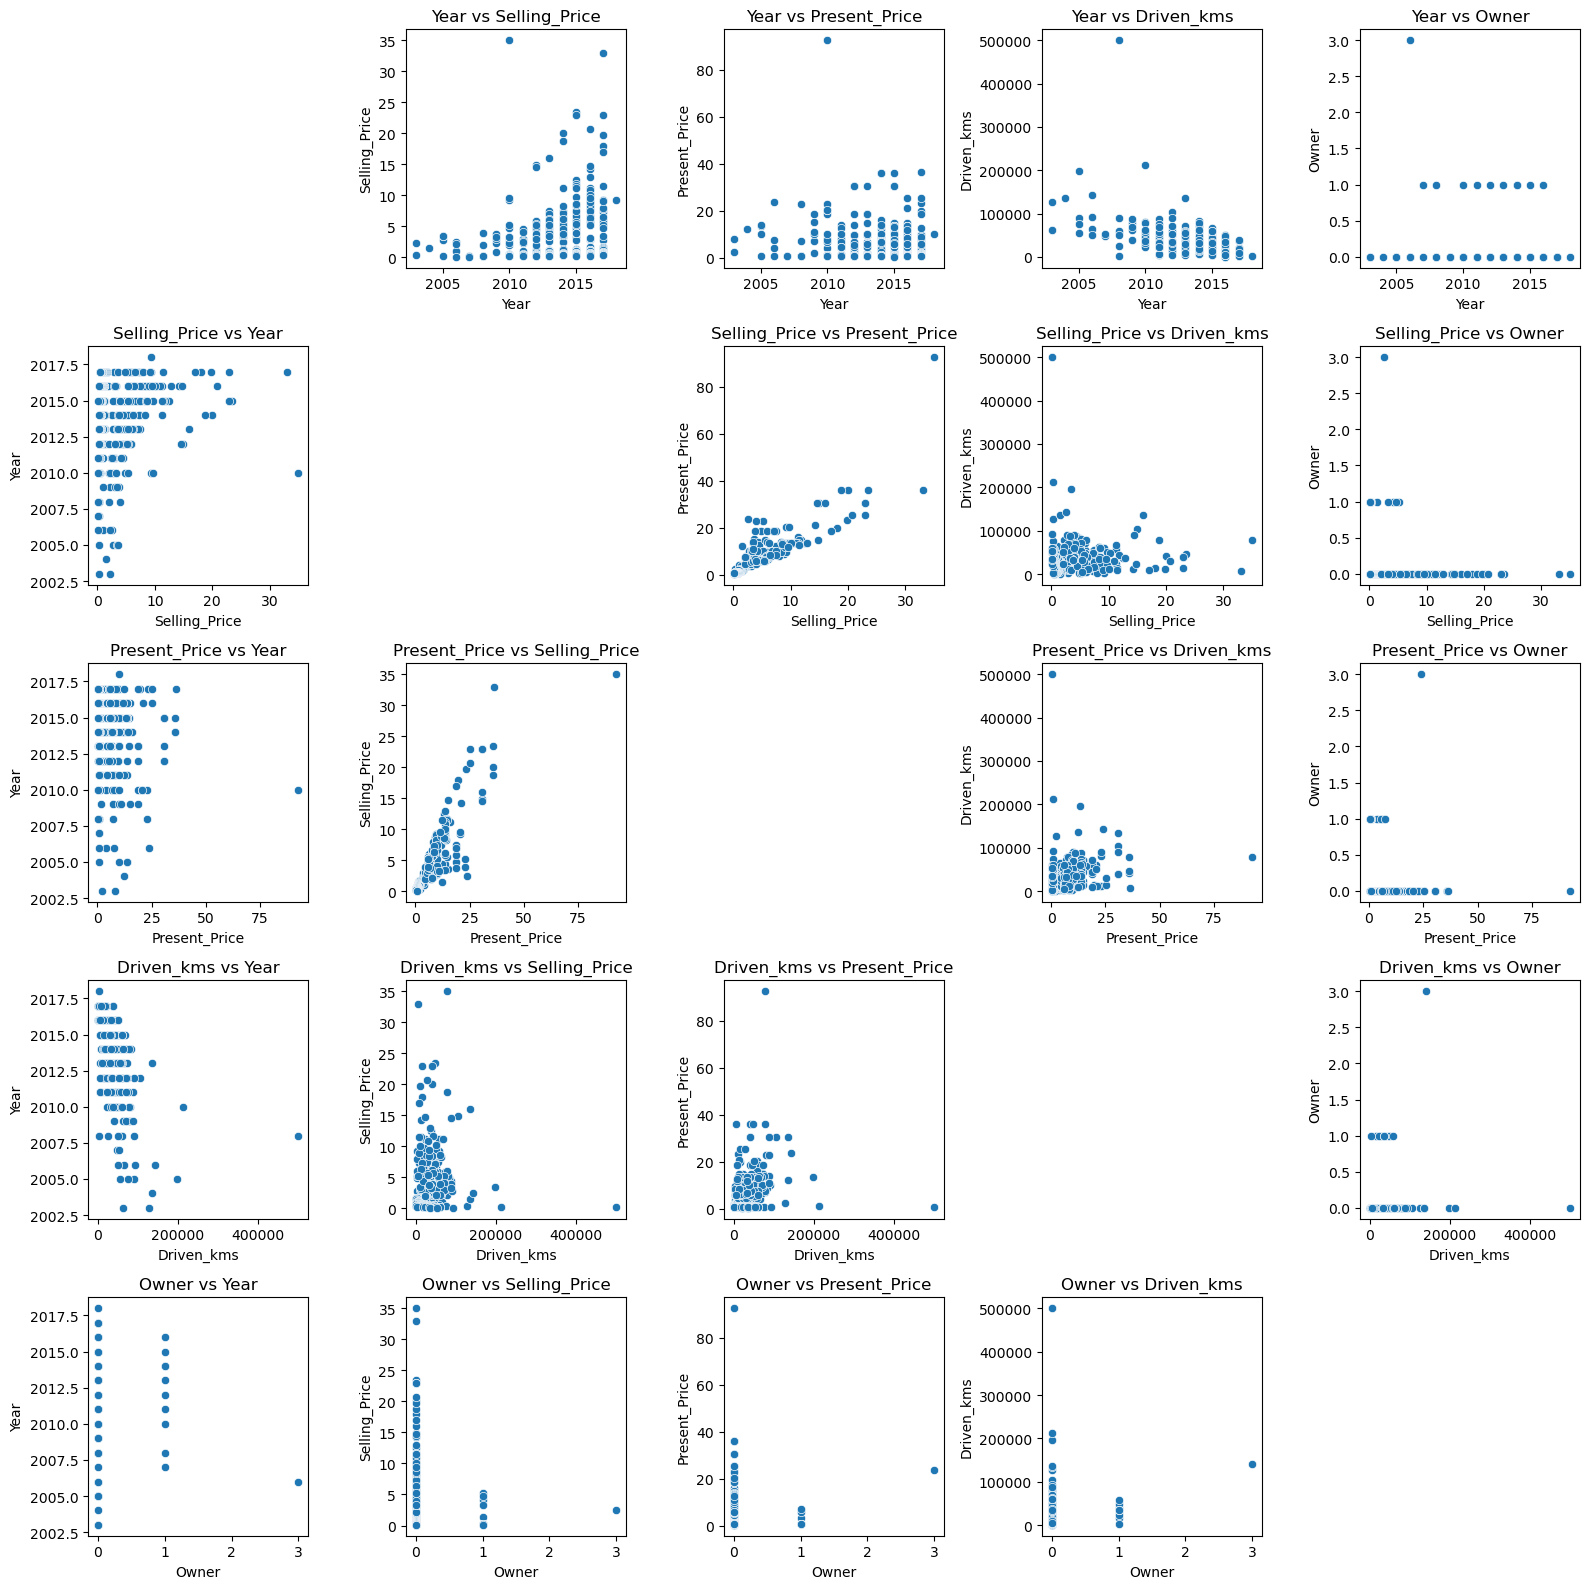

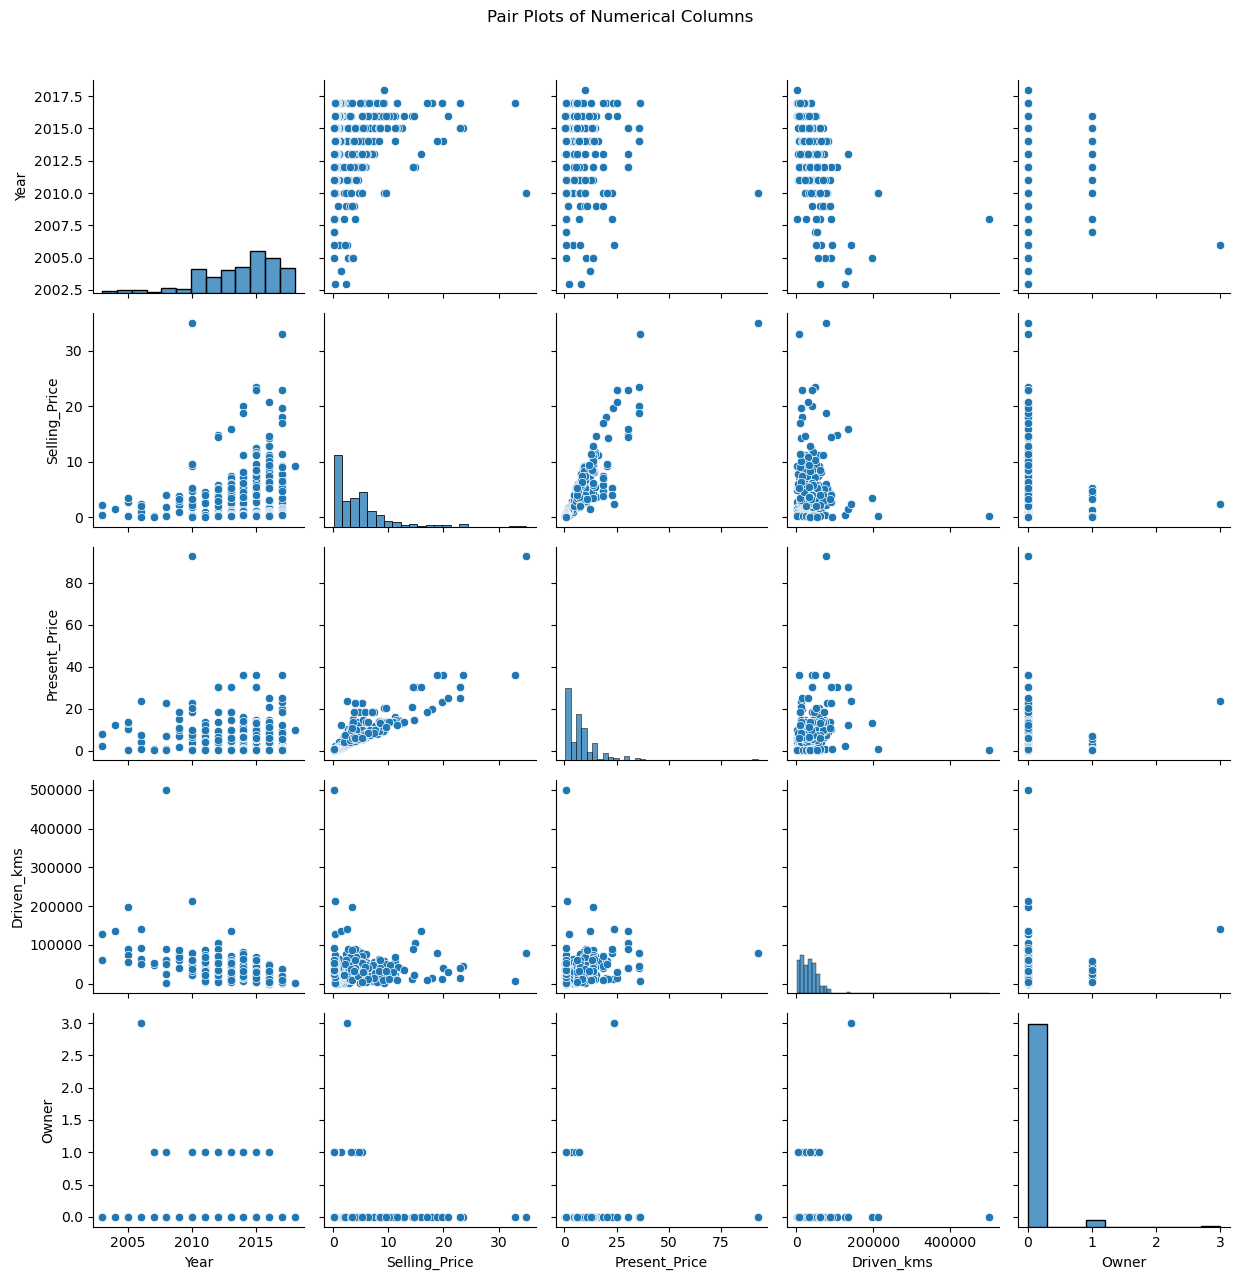

In [12]:
def scatter_plots(df, numerical_columns):
    num_cols = len(numerical_columns)
    fig, axes = plt.subplots(num_cols, num_cols, figsize=(16, 16))
    for i in range(num_cols):
        for j in range(num_cols):
            if i != j:
                sns.scatterplot(ax=axes[i, j], x=df[numerical_columns[i]], y=df[numerical_columns[j]])
                axes[i, j].set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
                axes[i, j].set_xlabel(numerical_columns[i])
                axes[i, j].set_ylabel(numerical_columns[j])
            else:
                axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()
def pair_plots(df, numerical_columns):
    pair_plot = sns.pairplot(df[numerical_columns])
    pair_plot.fig.suptitle('Pair Plots of Numerical Columns', y=1.02)
    plt.tight_layout()
    plt.show()
scatter_plots(df, numerical_columns)
pair_plots(df, numerical_columns)

In [13]:
drop_col=['Car_Name']
df.drop(drop_col,inplace=True,axis=1)
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns]

,Fuel_Type,Selling_type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual
...,...,...,...
296,Diesel,Dealer,Manual
297,Petrol,Dealer,Manual
298,Petrol,Dealer,Manual
299,Diesel,Dealer,Manual


In [14]:
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'Fuel_Type':
['Petrol' 'Diesel' 'CNG']

Unique values in 'Selling_type':
['Dealer' 'Individual']

Unique values in 'Transmission':
['Manual' 'Automatic']



In [15]:
df1 = pd.get_dummies(df, columns=object_columns)
df1

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Selling_Price_log,Present_Price_log,Driven_kms_log,Owner_log,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,1.470176,1.885553,10.203629,0.0,False,False,True,True,False,False,True
1,2013,4.75,9.54,43000,0,1.749200,2.355178,10.668979,0.0,False,True,False,True,False,False,True
2,2017,7.25,9.85,6900,0,2.110213,2.384165,8.839422,0.0,False,False,True,True,False,False,True
3,2011,2.85,4.15,5200,0,1.348073,1.638997,8.556606,0.0,False,False,True,True,False,False,True
4,2014,4.60,6.87,42450,0,1.722767,2.063058,10.656106,0.0,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,2.351375,2.533697,10.433792,0.0,False,True,False,True,False,False,True
297,2015,4.00,5.90,60000,0,1.609438,1.931521,11.002117,0.0,False,False,True,True,False,False,True
298,2009,3.35,11.00,87934,0,1.470176,2.484907,11.384353,0.0,False,False,True,True,False,False,True
299,2017,11.50,12.50,9000,0,2.525729,2.602690,9.105091,0.0,False,True,False,True,False,False,True


In [16]:
df1.shape

(301, 16)

In [17]:
y=df1['Selling_Price']
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [18]:
X = df1.drop(['Selling_Price'],axis=1)
X

,Year,Present_Price,Driven_kms,Owner,Selling_Price_log,Present_Price_log,Driven_kms_log,Owner_log,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,5.59,27000,0,1.470176,1.885553,10.203629,0.0,False,False,True,True,False,False,True
1,2013,9.54,43000,0,1.749200,2.355178,10.668979,0.0,False,True,False,True,False,False,True
2,2017,9.85,6900,0,2.110213,2.384165,8.839422,0.0,False,False,True,True,False,False,True
3,2011,4.15,5200,0,1.348073,1.638997,8.556606,0.0,False,False,True,True,False,False,True
4,2014,6.87,42450,0,1.722767,2.063058,10.656106,0.0,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,2.351375,2.533697,10.433792,0.0,False,True,False,True,False,False,True
297,2015,5.90,60000,0,1.609438,1.931521,11.002117,0.0,False,False,True,True,False,False,True
298,2009,11.00,87934,0,1.470176,2.484907,11.384353,0.0,False,False,True,True,False,False,True
299,2017,12.50,9000,0,2.525729,2.602690,9.105091,0.0,False,True,False,True,False,False,True


In [20]:
print(df1.columns)

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner',
       'Selling_Price_log', 'Present_Price_log', 'Driven_kms_log', 'Owner_log',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Selling_type_Dealer', 'Selling_type_Individual',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')
